# Best Markets to Invest Marketing Funds

In this project we will find which courses are best to advertise in for a certain e-learning company. 

## Reading and initial analysis of data

We will be using data from  freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. We'll read in the file using the direct link here.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning


In [30]:
print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Assessing representivity

In [31]:
# create a frequency table for jobroleinterest

fcc["JobRoleInterest"].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                    2.030892
  Mobile Developer                                                                                                                                                                        1.673341
Game Developer           

Upon a quick glance, the dataset did not split the multiple job roles that a student may be interested in. Cleaning the data in such a way is beyond the scope of this project, but can very well be considered as a "next step" for this project.

In [32]:
#let's see how many people hvae only 1 role they are interested in

interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the variance describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the population are intersted in only one role. Now let us look at how many people are interested in web development compared to every other role.

In [33]:
# Create a frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


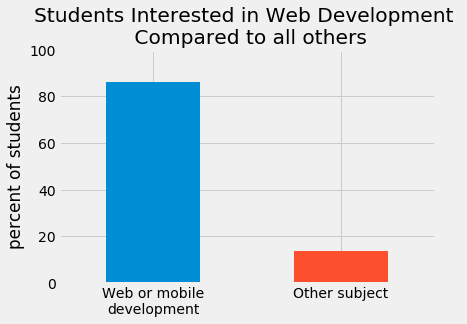

In [34]:
#graph the frequency table

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Students Interested in Web Development \n Compared to all others')
plt.ylabel('percent of students')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()


It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. Although we should strive to cater to people with varying interests, it would be prudent to focus on web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located?

What are the locations with the greatest number of new coders?


How much money new coders are willing to spend on learning?

## Density of students by country

We will analyze the countries where students are located, and how dense the population distribution is. This is a good place to start for our ad campaign because it will allow us to choose which locations to implememt our ad campaign. 

We will start this by cleaning the data.

In [35]:
# remove any line where any participant did not answer what role they are interested in. 

fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

#Create frequency tables for country
country_frequencies = fcc_good['CountryLive'].value_counts()
country_frequencies_relative = fcc_good['CountryLive'].value_counts(normalize = True)*100

#display in a more easy to read table
pd.DataFrame(data = {'Absolute frequency': country_frequencies, 
                     'Percentage': country_frequencies_relative}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


By viewing the table above, we can see that 45% of students are living in the United States. This is a pularility, and is significantly larger than the next few countries, including India (7.7%), UK (4.6%), and Canada (3.8%).

Based on this we can give justification to focusing the ad campaign within the United States. However, It is also imperative to continue analyzing so that we can have a firm understanding of how much time and money students are willing to spend. 

## Students spending money

It is important for us to understand the way students spend money on our services, as catering or advertising to students who are only interested in using our products for free would be extremely unprofitable for the company. Given that, We will look at the top 4 countries (USA, India, UK, and Canada) to analyze the money trends. 

In [36]:
#create a column that shows how much each student has spent per month
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

#create new column
fcc_good['MoneyPerMonth'] = fcc_good['MoneyForLearning']/fcc_good['MonthsProgramming']
#count how many values in this new column is null
fcc_good['MoneyPerMonth'].isnull().sum()

675

In [37]:
#Get rid of any null values in the monney per month column and the country live column
fcc_good = fcc_good[fcc_good['MoneyPerMonth'].notnull()]
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

#create frequency table to see if we still have enough data
fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough data to continue. Let's start by finding the average amount of money spent by each of the top 4 countries.

In [38]:
# Mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

These results are surprising. One would assume that the UK and Canada would spend more than India would, given the differences in economic devlopment. It is interesting that the results indicate the opposite. We should check for outliers. 

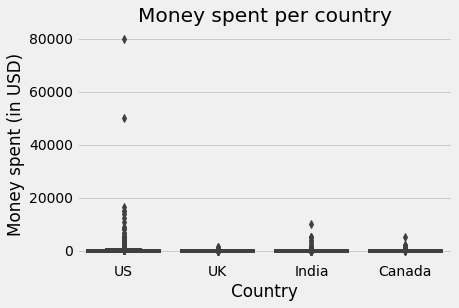

In [39]:
# generate box plots of all 4 nations

#isolate the top 4 countries
top_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

#create boxplot
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = top_4)
plt.title('Money spent per country')
plt.ylabel('Money spent (in USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Looking at the boxplots for UK, India, and Canada, there don't seem to be many outliers that would skew the average. However,when looking at the boxplot for the United States, there are 2 huge outliers. We should take a look at that. Let us remove any outliers that is greater than 20,000.

In [40]:
# Remove any value over 20,000

fcc_good = fcc_good[fcc_good['MoneyPerMonth'] < 20000]

# Recompute mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

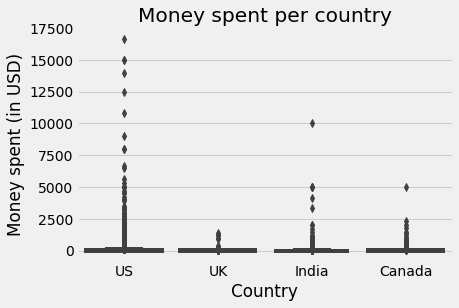

In [41]:
#Now recreate the boxplots

#Isolate the top 4 countries
top_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

#create boxplot
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = top_4)
plt.title('Money spent per country')
plt.ylabel('Money spent (in USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Let's ignore the United States for now. When looking at the UK, India, and Canada, India seems to have several outliers. It might be a good idae to closely analyze these outliers

In [42]:
#isolate the indian outliers

indiaout = top_4[(top_4['CountryLive']=='India') & (top_4['MoneyPerMonth'] >= 2500)]
indiaout

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It is hard to tell why these few students have spent so much more than their compatriots. The data does not indicate that they attended a bootcamp, or a code event. In any case, it is probably best to remove thses outliers. 

In [43]:
#drop Indian outliers

top_4 = top_4.drop(indiaout.index)

Let's look at the boxplot now. 

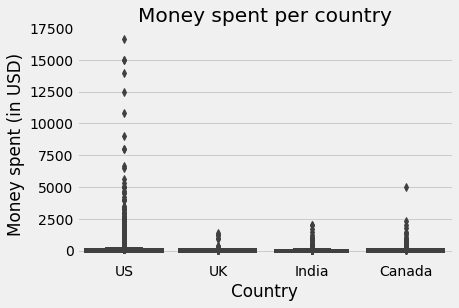

In [44]:
#create boxplot
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = top_4)
plt.title('Money spent per country')
plt.ylabel('Money spent (in USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It is probably best for us to view the outliers for the USA and Canada before we make our final assessment. 

In [45]:
americaout = top_4[(top_4['CountryLive']=='United States of America') & (top_4['MoneyPerMonth'] >= 6000)]
americaout

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Of the 11 outliers, 6 started a boot camp, and 2 finished. This explains the extra spending for these 6 outliers. Only 2 went to code conferences. It is interesting to see such a low completion rate from the outliers. A future analysis might compare that percentage to the rest of the American population. For now we will remove any outlier who did not start a bootcamp. 

In [46]:
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['MoneyPerMonth'] >= 6000) &
    (top_4['AttendedBootcamp'] == 0)
]

top_4 = top_4.drop(no_bootcamp.index)

In [47]:
#Now for Canada
canadaout = top_4[(top_4['CountryLive']=='Canada') & (top_4['MoneyPerMonth'] >= 2700)]
canadaout

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The one Canada outlier did attend a bootcamp, but did not finish. As with the American outliers, it would be interesting to analyze what is causing these high spenders to not finish their bootcamps. Since this individual did start a bootcamp, we will include them with the rest of the data.

In [48]:
# Recompute the mean of each top 4 country

top4_mean = top_4.groupby('CountryLive').mean()
top4_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    160.532509
India                        65.758763
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

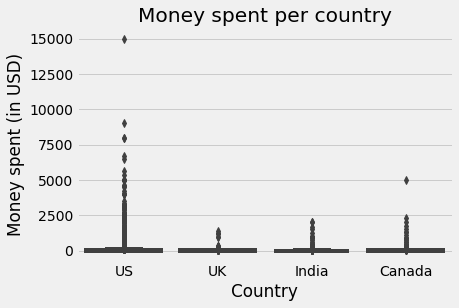

In [49]:
#create boxplot
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = top_4)
plt.title('Money spent per country')
plt.ylabel('Money spent (in USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing Two Countries to Invest Marketing Resources

It is quite clear that the United States of America should be priortized for marketing investment. A very large percentage of the company's students reside there and they are willing to spend a very large amount of money (around \\$160). Now choosing the second country is a little more difficult. 

It is clear that the United Kingdom should not be considered given the fact that they are willing to spend the least of the top 4 countries (around \\$45). Choosing between Canada and India, is a little more difficult. 

One on hand, Canadians are willing to spend more (\\$113) compared to India (\\$65), But there is over twice the amount of students in India. The company should decide if the potential to acquire more customers is justifiable to work around customers who are willing to spend less on the product. It is also important to note that the company offers monthly subscriptions for \\$59, which is within the India's average spending. It is this analyst's opinion that India's growing market, along with it's ability to tolerate monthly subscriptions at the current price point, make it the more profitable option when compared to Canada. 

## Conclusion

In conclusion, it is obvious to invest in the United States, after some deliberation, I would recommend the company invest in India, as opposed to Canada due to larger markets, however the marketing team should decide if the Indian market is large enough to compensate for a lower appetite to spend on the product compared to Canada. Some future analysis of this project may include cleaning the data to incorporate students with multiple interests, or analyzing why high spenders in USA and Canada start boot camps, but do not finish them. 